In [51]:
from tensorflow.keras.models import load_model

model = load_model('best_model', compile=False)  # Load the trained model


In [52]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [53]:
def crop_image(image, crop_size):

    width, height = image.size
    crop_width, crop_height = crop_size

    cropped_images = []

    # Iterate over the image to create multiple crops
    for x in range(0, width, crop_width):
        for y in range(0, height, crop_height):
            # Calculate the crop coordinates
            left = x
            upper = y
            right = x + crop_width
            lower = y + crop_height

            # Crop the image
            cropped_image = image.crop((left, upper, right, lower))

            # Append the cropped image and mask to the lists
            cropped_images.append(np.array(cropped_image))

    return cropped_images

In [54]:
def join_masks(masks, crop_size, image_size):
    x_steps = int(np.ceil(image_size[1] / crop_size[1]))
    y_steps = int(np.ceil(image_size[0] / crop_size[0]))
    image = np.zeros((image_size[0], image_size[1], 1))
    for x in range(x_steps):
        for y in range(y_steps):
            x_start = x * crop_size[1]
            y_start = y * crop_size[0]
            image[y_start:y_start + crop_size[0], x_start:x_start + crop_size[1]] = masks[x * y_steps + y]
    return image

2/2 [==============================] - 1s 526ms/step


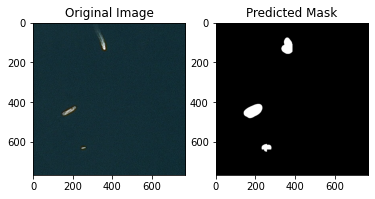

2/2 [==============================] - 0s 248ms/step


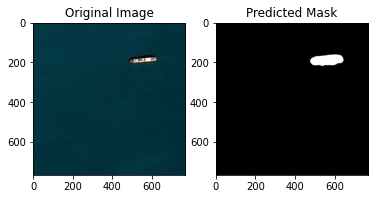

2/2 [==============================] - 0s 231ms/step


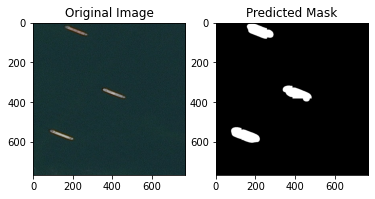

2/2 [==============================] - 0s 251ms/step


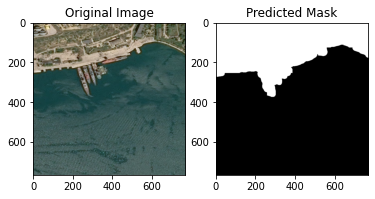

2/2 [==============================] - 0s 260ms/step


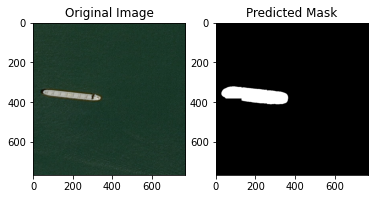

In [55]:
image_folder = './test'  # Folder containing the images for prediction
crop_size = (128, 128)
# Iterate over each image in the folder
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    image = load_img(image_path)
    crop_images = crop_image(image, crop_size)
    masks = model.predict(np.array(np.array(crop_images)))
    mask = join_masks(masks, crop_size, image.size)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    # Display the predicted mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')  # Assuming the mask is a grayscale image
    plt.title('Predicted Mask')

    plt.show()